<a href="https://colab.research.google.com/github/GianValenzuela/Repositorio-de-Gian-Pier-Valenzuela-Gen-Evol-Herramientas-Bioinform-ticas-/blob/main/Clase_3_Gen_evol_Gian_valenzuela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🧬 Análisis básico de SNPs en plantas usando datos de NCBI

Este notebook guía el análisis simple de SNPs del gen BRCA1 _Homo sapiens_ usando datos de NCBI. Objetivo: Aprender a recuperar datos de SNPs desde NCBI usando Biopython y realizar un análisis exploratorio básico.

## 📦  1. Importar librerías necesarias

In [ ]:
# 🔧 Librerías para acceder a NCBI y manejar datos

# 📘 Instalación de Biopython
!pip install biopython

from Bio import Entrez
import os
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# 📧 Configurar tu correo electrónico (requerido por NCBI)
Entrez.email = "allasicanales@gmail.com"

## 🏵 2. Obtener la data necesaria

In [ ]:
# 🧪 Buscar SNPs en BRCA1 en humanos
search_term = "BRCA1 AND Homo sapiens[Organism]"
handle = Entrez.esearch(db="snp", term=search_term, retmax=20)
record = Entrez.read(handle)
handle.close()

# 📋 Mostrar los IDs encontrados
snp_ids = record["IdList"]
print("🔎 SNP IDs encontrados:", snp_ids)



🔎 SNP IDs encontrados: ['2552282559', '2552281972', '2552281880', '2552281808', '2552281780', '2552281763', '2552281739', '2552281738', '2552281728', '2552281725', '2552281715', '2552281691', '2552281468', '2552281431', '2552281423', '2552281410', '2552281409', '2552281374', '2552281365', '2552281348']



## 📊 3. Obtención de SNPs y parseo de ellos


In [ ]:
# Obtener los SNP records
if snp_ids:
    handle = Entrez.efetch(db="snp", id=",".join(snp_ids), rettype="xml")
    snp_data = handle.read()
    handle.close()
    print(snp_data[:1000])  # Ver los primeros 1000 characters

print(snp_data[:2000])  # 👀 Vista previa del XML

b'<?xml version="1.0" ?>\n<ExchangeSet xmlns:xsi="https://www.w3.org/2001/XMLSchema-instance" xmlns="https://www.ncbi.nlm.nih.gov/SNP/docsum" xsi:schemaLocation="https://www.ncbi.nlm.nih.gov/SNP/docsum ftp://ftp.ncbi.nlm.nih.gov/snp/specs/docsum_eutils.xsd" ><DocumentSummary uid="2552282559"><SNP_ID>2552282559</SNP_ID><ALLELE_ORIGIN/><GLOBAL_MAFS><MAF><STUDY>TOMMO</STUDY><FREQ>C=0.00001/1</FREQ></MAF></GLOBAL_MAFS><GLOBAL_POPULATION/><GLOBAL_SAMPLESIZE>0</GLOBAL_SAMPLESIZE><SUSPECTED/><CLINICAL_SIGNIFICANCE/><GENES><GENE_E><NAME>BRCA1</NAME><GENE_ID>672</GENE_ID></GENE_E><GENE_E><NAME>NBR2</NAME><GENE_ID>10230</GENE_ID></GENE_E></GENES><ACC>NC_000017.11</ACC><CHR>17</CHR><HANDLE>TOMMO_GENOMICS</HANDLE><SPDI>NC_000017.11:43127348:G:C</SPDI><FXN_CLASS>upstream_transcript_variant,2KB_upstream_variant,intron_variant</FXN_CLASS><VALIDATED>by-frequency</VALIDATED><DOCSUM>HGVS=NC_000017.11:g.43127349G&gt;C,NC_000017.10:g.41279366G&gt;C,NG_005905.2:g.90635C&gt;G,NG_056086.2:g.2955G&gt;C|SEQ=[G

In [ ]:
# Parsear el XML correctamente
root = ET.fromstring(snp_data)
snp_info = []

# Buscar cada resumen de SNP
for doc in root.findall(".//{https://www.ncbi.nlm.nih.gov/SNP/docsum}DocumentSummary"):
    snp_id = doc.find("{https://www.ncbi.nlm.nih.gov/SNP/docsum}SNP_ID")
    snp_class = doc.find("{https://www.ncbi.nlm.nih.gov/SNP/docsum}SNP_CLASS")
    chrpos = doc.find("{https://www.ncbi.nlm.nih.gov/SNP/docsum}CHRPOS")
    fxn_class = doc.find("{https://www.ncbi.nlm.nih.gov/SNP/docsum}FXN_CLASS")

    snp_info.append({
        "SNP_ID": snp_id.text if snp_id is not None else None,
        "SNP_CLASS": snp_class.text if snp_class is not None else None,
        "CHRPOS": chrpos.text if chrpos is not None else None,
        "FXN_CLASS": fxn_class.text if fxn_class is not None else None
    })

# Convertir a DataFrame
df_snps = pd.DataFrame(snp_info)
df_snps.head()


,SNP_ID,SNP_CLASS,CHRPOS,FXN_CLASS
0,2552282559,snv,17:43127349,"upstream_transcript_variant,2KB_upstream_varia..."
1,2552281972,snv,17:43127232,"upstream_transcript_variant,2KB_upstream_varia..."
2,2552281880,del,17:43127053,"upstream_transcript_variant,2KB_upstream_varia..."
3,2552281808,snv,17:43126996,"upstream_transcript_variant,2KB_upstream_varia..."
4,2552281780,snv,17:43126982,"upstream_transcript_variant,2KB_upstream_varia..."


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('SNP_ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('SNP_CLASS').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('CHRPOS').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('SNP_ID')):
  _plot_series(series, series_name, i)
  fig.legend(title='SNP_ID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('SNP_CLASS')):
  _plot_series(series, series_name, i)
  fig.legend(title='SNP_CLASS', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('CHRPOS')):
  _plot_series(series, series_name, i)
  fig.legend(title='CHRPOS', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['SNP_CLASS'].value_counts()
    for x_label, grp in _df_8.groupby('SNP_ID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('SNP_ID')
_ = plt.ylabel('SNP_CLASS')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['CHRPOS'].value_counts()
    for x_label, grp in _df_9.groupby('SNP_CLASS')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('SNP_CLASS')
_ = plt.ylabel('CHRPOS')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['SNP_ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='index', y='SNP_ID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['SNP_CLASS'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='index', y='SNP_CLASS', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['CHRPOS'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='index', y='CHRPOS', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## 🧬 4. Clasificar SNPs por tipo (SNP_CLASS)

🧬 Distribución de clases de SNPs:
SNP_CLASS
snv       16
delins     3
del        1
Name: count, dtype: int64


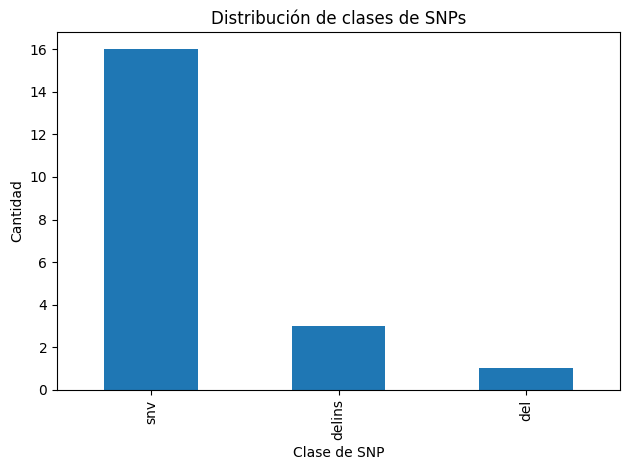

In [ ]:
print("🧬 Distribución de clases de SNPs:")
print(df_snps["SNP_CLASS"].value_counts())

# Visualización
df_snps["SNP_CLASS"].value_counts().plot(kind='bar', title='Distribución de clases de SNPs')
plt.xlabel("Clase de SNP")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()



## 🔬 5. Analizar la función genética (FXN_CLASS)

🔬 Clases funcionales de SNPs:
FXN_CLASS
upstream_transcript_variant    20
2KB_upstream_variant           20
intron_variant                 20
Name: count, dtype: int64


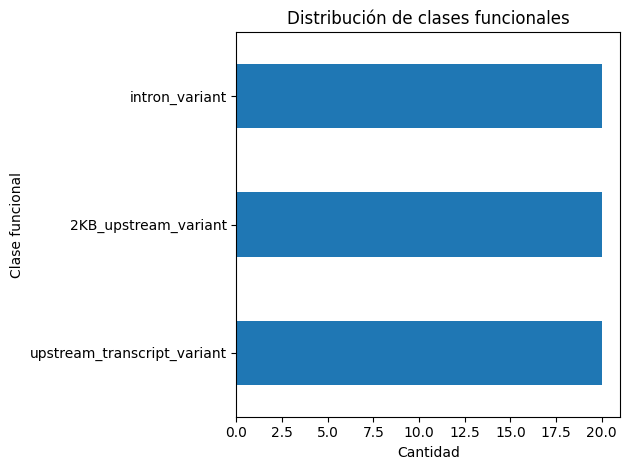

In [ ]:

print("🔬 Clases funcionales de SNPs:")
fxn_counts = df_snps["FXN_CLASS"].str.split(",").explode().value_counts()
print(fxn_counts)

# Visualización
fxn_counts.plot(kind='barh', title='Distribución de clases funcionales')
plt.xlabel("Cantidad")
plt.ylabel("Clase funcional")
plt.tight_layout()
plt.show()


## 🧭 6. Filtrar SNPs en regiones específicas (upstream)

In [ ]:

print("🧭 SNPs en regiones upstream:")
upstream_snps = df_snps[df_snps["FXN_CLASS"].str.contains("upstream", case=False, na=False)]
print(upstream_snps)


🧭 SNPs en regiones upstream:
        SNP_ID SNP_CLASS       CHRPOS  \
0   2552282559       snv  17:43127349   
1   2552281972       snv  17:43127232   
2   2552281880       del  17:43127053   
3   2552281808       snv  17:43126996   
4   2552281780       snv  17:43126982   
5   2552281763       snv  17:43126949   
6   2552281739       snv  17:43126883   
7   2552281738    delins  17:43126881   
8   2552281728    delins  17:43126843   
9   2552281725       snv  17:43126831   
10  2552281715       snv  17:43126813   
11  2552281691       snv  17:43126774   
12  2552281468       snv  17:43126469   
13  2552281431       snv  17:43126366   
14  2552281423       snv  17:43126332   
15  2552281410       snv  17:43126273   
16  2552281409    delins  17:43126271   
17  2552281374       snv  17:43126197   
18  2552281365       snv  17:43126177   
19  2552281348       snv  17:43126156   

                                            FXN_CLASS  
0   upstream_transcript_variant,2KB_upstream_varia...


## 🧠 7. Preguntas de interpretación
- ¿Qué implicaciones evolutivas puede tener la presencia de SNPs en regiones upstream o intrónicas?
- ¿Qué tipos de variantes esperarías encontrar en regiones codificantes vs. no codificantes?
- ¿Qué importancia tiene que varios SNPs estén agrupados en una misma región cromosómica? ¿Podría indicar un hotspot de variación?


¿Qué tipos de variantes esperarías encontrar en regiones codificantes vs. no codificantes?

#